In [1]:
# Getting data from kaggle

!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c icr-identify-age-related-conditions

Saving kaggle.json to kaggle.json
  0% 0.00/150k [00:00<?, ?B/s]
100% 150k/150k [00:00<00:00, 82.8MB/s]


In [2]:
!unzip '/content/icr-identify-age-related-conditions.zip'

Archive:  /content/icr-identify-age-related-conditions.zip
  inflating: greeks.csv              
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Modules

In [82]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

# Fixed Variables


In [83]:
#random_state
random_state = 88

# EDA

Quick peak into the dataset:

In [4]:
train = pd.read_csv('/content/train.csv')
# test = pd.read_csv('/content/test.csv')
'''
- test file contains only 5 observations and rest as null values
- not very relevent as this is a code type competition
'''
# greeks = pd.read_csv('/content/greeks.csv')
'''
- ignored for the fact that is not provided in the test set
'''

## Train Dataset

In [5]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [6]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [7]:
train.dtypes.value_counts()

float64    55
object      2
int64       1
dtype: int64

In [8]:
# main descriptive stats
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


### Correlation Analysis

<ipython-input-9-f00d4e98318d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

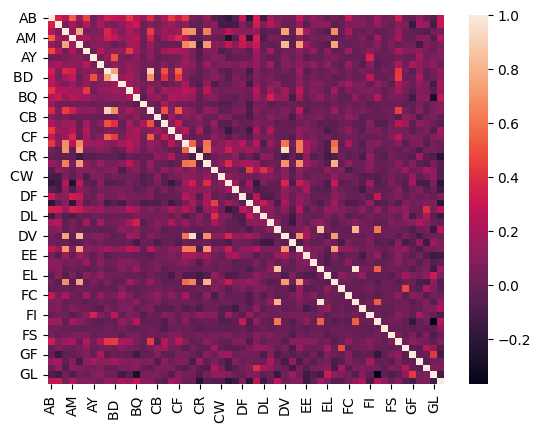

In [9]:
corr = train.corr()
sns.heatmap(corr)

<Axes: >

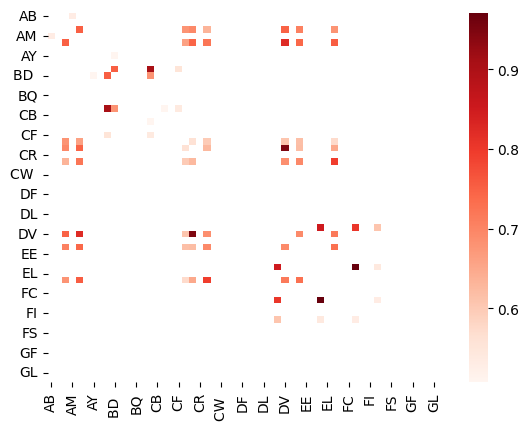

In [10]:
# filtring correlation values for highest (-+.5)
filtred_corr = corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)]
sns.heatmap(filtred_corr, annot=False, cmap="Reds")

Very fiew hot spot of hight correlated (+/-) variables considering duplicated values of the upper right triangle.

### Target Variable

In [20]:
# Balanced?
train['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

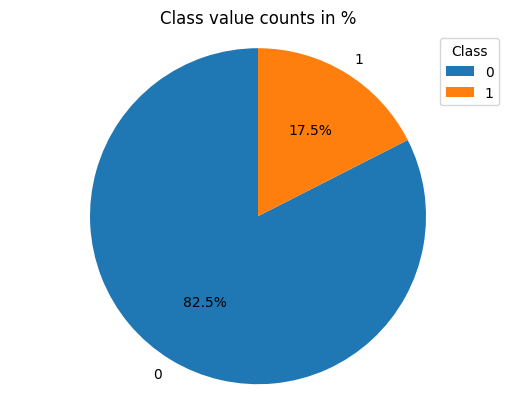

In [26]:
# code from matplotlib documentation to draw a pie chart

sizes = train['Class'].value_counts().to_list()
labels = train['Class'].value_counts().index.to_list()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.legend(title='Class')
ax1.set_title('Class value counts in %')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The target variable is imbalanced, with ratio of approx 1 to 5.

So, a data augmentation and/or balancing technique might be required in the modeling section.

## Greeks dataset

Ignored at this stage, as it will not be provided in the testing data.

# Preprocessing

In [ ]:
# normalization
# spliting data into training/testing/validation

## Missing Data

In [27]:
# Removing rows with missig data
train = train.dropna()

In [30]:
train.isna().sum().sum()

0

## Converting Categorical variables

In [38]:
# getting dummies for categorical variable
train.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

So, beside the [Class] column, we have one categorical variable called [EJ].

We use pandas' get_dummies methods to 'Convert categorical variable into dummy/indicator variables' as the docummentation suggest promise.


In [39]:
# A Glimpse into EJ variables
train['EJ'].value_counts()

B    329
A    219
Name: EJ, dtype: int64

In [54]:
train = pd.get_dummies(train, columns= ['EJ'], dtype='float64')

In [55]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_A',
       'EJ_B'],
      dtype='object')

In [57]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,0.0,1.0
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,1.0,0.0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,0.0,1.0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,0.0,1.0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,0.0,1.0


The categorical column 'EJ' is now converted into two numerical EJ_A and EJ_B columns.

## Data Scaling

Different features with a variety of magnitudes expore our models (linear ones) to the risk of bias resulting from associating penality/importance to the order of magniture of each variable.

In [78]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train.drop(columns=['Id']))

In [80]:
scaled_train = pd.DataFrame(scaled_train,
                            columns=train.drop(columns=['Id']).columns)
scaled_train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,0.028487,0.102347,0.000000,0.030632,0.000000,0.000000,0.000000,0.180337,0.002958,0.047364,...,0.000866,0.049385,0.000000,0.013846,0.176983,0.362261,0.005425,1.0,0.0,1.0
1,0.013752,0.027589,0.000000,0.053864,0.000000,0.078048,0.000000,0.284500,0.000000,0.074042,...,0.016014,0.033753,0.000000,0.194527,0.274495,0.164135,1.000000,0.0,1.0,0.0
2,0.088409,0.085715,0.000000,0.046519,0.000000,0.160575,0.000000,0.265013,0.000000,0.067011,...,0.036139,0.246003,0.011229,0.095035,0.258994,0.180218,0.008910,0.0,0.0,1.0
3,0.038310,0.127285,0.019180,0.117854,0.000000,0.079462,0.000000,0.215235,0.000000,0.048203,...,0.006925,0.104313,0.006882,0.014475,0.425143,0.470820,0.007039,0.0,0.0,1.0
4,0.067780,0.124246,0.000000,0.017417,0.000000,0.086300,0.002841,0.000000,0.069008,0.078555,...,0.001731,0.088112,0.051588,0.059198,0.500829,0.185841,0.004345,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.020629,0.084738,0.000000,0.006201,0.000000,0.088658,0.000000,0.000000,0.000000,0.098581,...,0.042415,0.091949,0.121764,0.076141,0.403292,0.210777,1.000000,0.0,1.0,0.0
544,0.014735,0.103085,0.021132,0.010101,0.028583,0.074511,0.005030,0.144730,0.001076,0.047970,...,0.000000,0.031266,0.101448,0.056218,0.211871,0.358883,1.000000,0.0,1.0,0.0
545,0.080550,0.184921,0.000000,0.069139,0.045868,0.140533,0.000030,0.259345,0.001742,0.077101,...,0.011469,0.236979,0.297867,0.021368,0.281649,0.651146,0.006562,0.0,0.0,1.0
546,0.078585,0.079539,0.024625,0.083174,0.010930,0.196180,0.000000,0.337644,0.000000,0.081672,...,0.000000,0.115256,0.039506,0.044942,0.233126,0.623561,1.000000,0.0,1.0,0.0


Now, we have training features with the same magnitudes (from 0 to 1). 

## Spliting training and testing sets

In [84]:
# Define X and y
y = scaled_train['Class']
X = scaled_train.drop(columns='Class')

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_state)

# Modeling

In [ ]:
# In progress...

In [ ]:
# How to customize loss function into modeling consideration?
# https://www.interviewsvector.com/how-implement-custom-loss-function-in-scikit-learn/

##Custom loss function

In order to align with the competition goals (optimizing for balanced log loss) and reduce the impact of the imballaced target variable, a customized loss function seems to be necessary to handle these issues.

In [ ]:
# balanced log loss
def balanced_log_loss(y_true, y_pred):
  '''
  As copied from the following notebook
  {https://www.kaggle.com/competitions/icr-identify-age-related-conditions/discussion/409691}
  '''
  # calculate the number of observations for each class
  N_0 = np.sum(1 - y_true)
  N_1 = np.sum(y_true)
   # calculate the weights for each class
  w_0 = 1 / N_0
  w_1 = 1 / N_1
   # calculate the predicted probabilities for each class
  p_0 = np.clip(y_pred[:, 0], 1e-15, 1 - 1e-15)
  p_1 = np.clip(y_pred[:, 1], 1e-15, 1 - 1e-15)
   # calculate the log loss for each class
  log_loss_0 = -w_0 * np.sum(y_true * np.log(p_0))
  log_loss_1 = -w_1 * np.sum(y_true * np.log(p_1))
   # calculate the balanced logarithmic loss
  balanced_log_loss = (log_loss_0 + log_loss_1) / (w_0 + w_1)
  return balanced_log_loss

In [ ]:
custom_loss = make_scorer(balanced_log_loss, greater_is_better=False)

In [ ]:
# Baseline logistic regression

In [ ]:
# Stepwise logistic regression algorithms

In [ ]:
# Ensemble modeling
## Without stacking
'''
boosting/bagging/nn
'''
## With stacking
'''
boosting/bagging/nn
'''

# Insights

In [ ]:
# Modeling Results comparaison
## with balanced log loss function

In [ ]:
# Submission Results of the best model

# Extra

In [ ]:
# Code for computing the balanced log loss
'''
Source: 
https://www.kaggle.com/competitions/icr-identify-age-related-conditions/discussion/409691
'''
import numpy as np
def balanced_log_loss(y_true, y_pred):
  # calculate the number of observations for each class
  N_0 = np.sum(1 - y_true)
  N_1 = np.sum(y_true)
   # calculate the weights for each class
  w_0 = 1 / N_0
  w_1 = 1 / N_1
   # calculate the predicted probabilities for each class
  p_0 = np.clip(y_pred[:, 0], 1e-15, 1 - 1e-15)
  p_1 = np.clip(y_pred[:, 1], 1e-15, 1 - 1e-15)
   # calculate the log loss for each class
  log_loss_0 = -w_0 * np.sum(y_true * np.log(p_0))
  log_loss_1 = -w_1 * np.sum(y_true * np.log(p_1))
   # calculate the balanced logarithmic loss
  balanced_log_loss = (log_loss_0 + log_loss_1) / (w_0 + w_1)
   return balanced_log_loss
